# INTRODUCTION TO REGRESSION WITH NEURAL NETWORKS IN TENSORFLOW

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

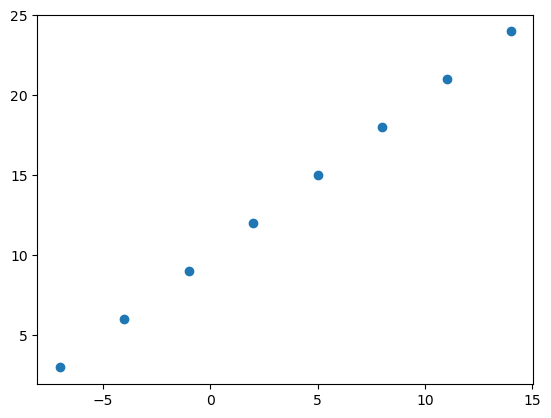

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-07-08 00:21:58.073011: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
x[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
x[0].ndim

0

In [9]:
x[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy Arayys into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

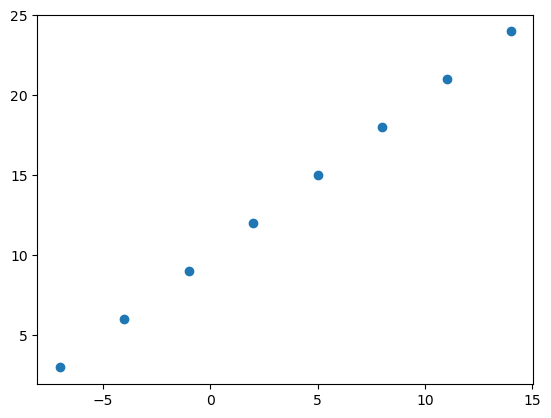

In [12]:
plt.scatter(x, y)

# Steps in modelling with TensorFlow

1. Creating a model
2. Compiling a model
3. Fitting a model

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5


1/1 [==============================] - 1s 982ms/step - loss: 16.9924 - mae: 16.9924
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 16.7112 - mae: 16.7112
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 16.4299 - mae: 16.4299
Epoch 4/5
1/1 [==============================] - 0s 23ms/step - loss: 16.1487 - mae: 16.1487
Epoch 5/5
1/1 [==============================] - 0s 29ms/step - loss: 15.8674 - mae: 15.8674


In [14]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 185ms/step


array([[-9.237384]], dtype=float32)

In [16]:
y_pred + 11

array([[1.7626162]], dtype=float32)

## Imporving our Model

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [17]:
# let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# 3. Fit the model (this time we train for longer)
model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100


1/1 [==============================] - 1s 905ms/step - loss: 12.9425 - mae: 12.9425
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8100 - mae: 12.8100
Epoch 3/100
1/1 [==============================] - 0s 85ms/step - loss: 12.6775 - mae: 12.6775
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 12.5450 - mae: 12.5450
Epoch 5/100
1/1 [==============================] - 0s 84ms/step - loss: 12.4125 - mae: 12.4125
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 12.2800 - mae: 12.2800
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 12.1475 - mae: 12.1475
Epoch 8/100
1/1 [==============================] - 0s 84ms/step - loss: 12.0150 - mae: 12.0150
Epoch 9/100
1/1 [==============================] - 0s 59ms/step - loss: 11.8825 - mae: 11.8825
Epoch 10/100
1/1 [==============================] - 0s 70ms/step - loss: 11.7500 - mae: 11.7500
Epoch 11/100
1/1 [==============================] - 0s 61ms/

In [18]:
# Remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 221ms/step


array([[29.74808]], dtype=float32)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100


1/1 [==============================] - 2s 2s/step - loss: 13.1402 - mae: 13.1402
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 12.3837 - mae: 12.3837
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 11.6226 - mae: 11.6226
Epoch 4/100
1/1 [==============================] - 0s 49ms/step - loss: 10.8520 - mae: 10.8520
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 10.0706 - mae: 10.0706
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 9.3246 - mae: 9.3246
Epoch 7/100
1/1 [==============================] - 0s 80ms/step - loss: 8.6511 - mae: 8.6511
Epoch 8/100
1/1 [==============================] - 0s 109ms/step - loss: 7.9611 - mae: 7.9611
Epoch 9/100
1/1 [==============================] - 0s 46ms/step - loss: 7.2534 - mae: 7.2534
Epoch 10/100
1/1 [==============================] - 0s 41ms/step - loss: 6.5270 - mae: 6.5270
Epoch 11/100
1/1 [==============================] - 0s 42ms/step - loss:

In [21]:
# let's remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 223ms/step


array([[27.232462]], dtype=float32)

# Evaluating a Modal

In [23]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

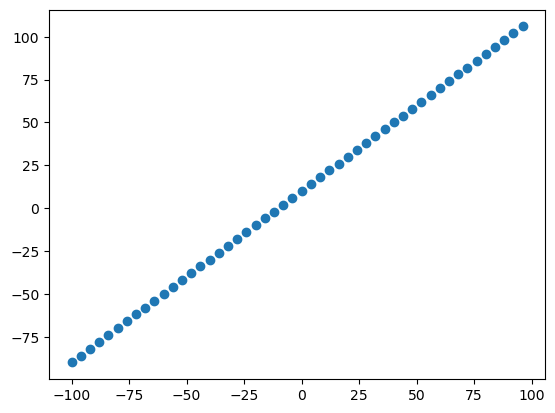

In [25]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [26]:
# Check the length of how many samples we have
len(x)

50

In [27]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
x_test = x[40:] # last 10 are testing samples (20% of the data)

y_train = y[:40] # first 40 are training samples (80% of the data)
y_test = y[40:] # last 10 are testing samples (20% of the data)

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data ###

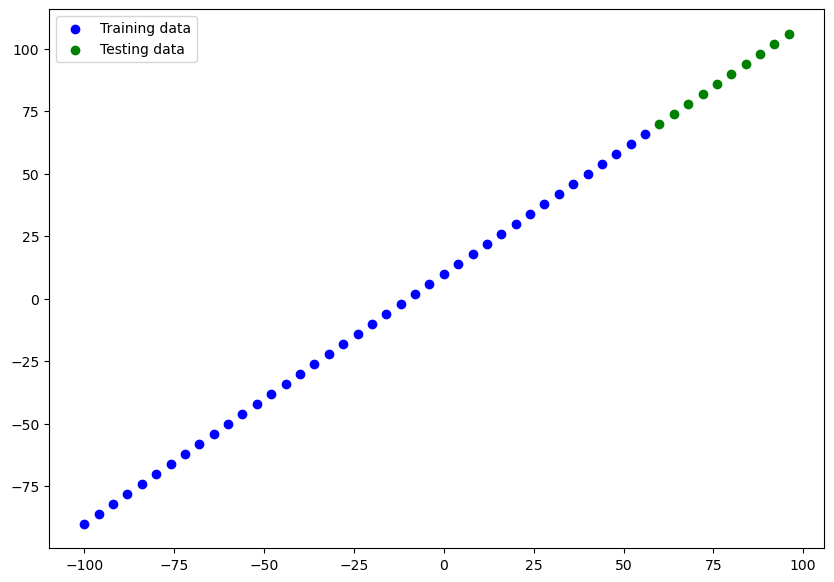

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend()

In [29]:
# Lets have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# # 3. Fit the model
# model.fit(x_train, y_train, epochs=100)

# Visualizing the data

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="modal_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])



In [31]:
model.summary()

Model: "modal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit the model
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100


2/2 [==============================] - 1s 48ms/step - loss: 29.0428 - mae: 29.0428
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 25.5066 - mae: 25.5066
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 30.0249 - mae: 30.0249
Epoch 4/100
2/2 [==============================] - 0s 104ms/step - loss: 12.9452 - mae: 12.9452
Epoch 5/100
2/2 [==============================] - 0s 42ms/step - loss: 16.5009 - mae: 16.5009
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 11.2218 - mae: 11.2218
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 12.2656 - mae: 12.2656
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 10.9599 - mae: 10.9599
Epoch 9/100
2/2 [==============================] - 0s 44ms/step - loss: 38.5938 - mae: 38.5938
Epoch 10/100
2/2 [==============================] - 0s 71ms/step - loss: 26.0888 - mae: 26.0888
Epoch 11/100
2/2 [==============================] - 0s 19ms/

In [33]:
# get a summary of our model
model.summary()

Model: "modal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [38]:
# from tensorflow.keras.utils import plot_model

# plot_model(model=model, show_shapes=True)


### Visualizing our modals predictions

In [39]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 130ms/step


array([[ 76.94327],
       [ 81.96003],
       [ 86.9768 ],
       [ 91.99356],
       [ 97.01033],
       [102.02711],
       [107.04387],
       [112.06063],
       [117.07739],
       [122.09416]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
# lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """_summary_
    Plots training data, test data and compares predictions to ground truth

    Args:
        train_data (_type_, optional): _description_. Defaults to x_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to x_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to y_pred.
    """
    
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # show the legend
    plt.legend()

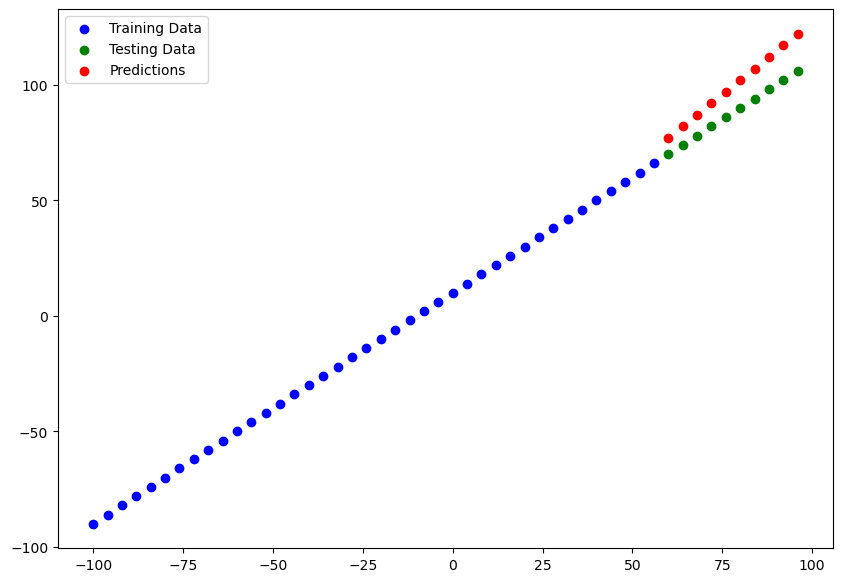

In [42]:
plot_predictions(train_data=x_train, 
                 train_labels=y_train, 
                 test_data=x_test, 
                 test_labels=y_test, 
                 predictions=y_pred)